### MNIST
머신러닝계의 ```Hello,World!```인 MNIST 학습을 해봅시다.
우선 tensorflow,numpy 그리고 그래프를 쉽게 그리게 해주는 ```matplotlib```을 import합니다.   
또한 ``` tensorflow.examples.tutorials.mnist.input_data``` 모듈 역시 import하고 label을 one-hot encoding 방식으로 읽어 들입니다

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


**README에서 언급했던것과 같이 MNIST의 손글씨 이미지는 28x28픽셀이므로 W1을 [784,]로 해주고 0~9중 하나로 분류하므로 W3은 [,10]으로 만들어 줍니다.**
또한, None자리에는 한번에 학습시킬 MNIST 이미지의 개수를 지정하는 값이 들어가는데 None을 써주면 알아서 해줍니다!


In [0]:
X = tf.placeholder(tf.float32,[None, 784])
Y = tf.placeholder(tf.float32,[None, 10])

간단하게 하기위해 편향b는 사용하지 않고 가중치만 사용하여 구성합니다.   
```tf.random_normal( , stddev = 0.01)```은 표준편차가 0.01인 정규분포를 가지는 임의의 값으로 이를 이용해 변수를 초기화 시킵니다.

마지막으로 ```tf.nn.dropout```함수를 사용하여 Dropout을 적용해 줍니다.
여기서 이전에 미리 ```keep_prob```라는 placeholder를 만들어 둡니다.

In [0]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,256],stddev = 0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L2,W3)

다음으로 ```tf.nn.softmax_cross_entropy_with_logits_v2```함수를 이용하여 각 이미지에 대한 cost를 구하고 ```tf.reduce_mean```을 이용해 그 평균값을 구합니다.   
또한 ```tf.train.AdamOptimizer```을 이용해 최적화도 시켜줍니다.

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

MNIST는 데이터 수가 수만 개로 매우 크므로 적당한 크기로 나누어 학습시키는 ```미니배치```를 사용합니다. 여기서 ```batch_size```를 통해 미니배치의 크기를 100으로 정해줍니다.   
또한 전체 데이터 수(```mnist.train.num_examples```)를 미니배치 크기(100)으로 나누어 전체 미니배치 수(```total_batch```)를 정해줍니다.

In [0]:
batch_size = 100
total_batch = int( mnist.train.num_examples / batch_size)

1번째 for문에서 MINIST데이터 전체를 15번 학습합니다.(**학습데이터 전체를 한 바퀴 도는 것을 ```epoch(에포크)```라 합니다.**)   
2번재 for문에서는 위에서 구한 미니배치의 수만큼 반복하여 총 학습데이터 전체를 학습시킵니다.    
또한 2번재 for문 안에 ```mnist.train.next_batch(batch_size)```함수를 이용해 학습할 데이터를 배치크기만큼 가져온 뒤, 입력값인 이미지 데이터는 ```batch_xs ```에 출력값인 레이블 데이터는 ```batch_ys```에 저장합니다.   
마지막으로 위에서 미리 설정한 ```keep_prob```에 0.8을 넣어 Dropoutd을 사용합니다.

In [45]:
for epoch in range(15):
  total_cost = 0

  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y: batch_ys, keep_prob:0.8})
    total_cost += cost_val
  print('Epoch:','%04d'%(epoch +1), 'Avg. cost=','{:.3f}'.format(total_cost/total_batch))
print('최적화 완료')  

Epoch: 0001 Avg. cost= 0.437
Epoch: 0002 Avg. cost= 0.167
Epoch: 0003 Avg. cost= 0.117
Epoch: 0004 Avg. cost= 0.089
Epoch: 0005 Avg. cost= 0.072
Epoch: 0006 Avg. cost= 0.060
Epoch: 0007 Avg. cost= 0.054
Epoch: 0008 Avg. cost= 0.048
Epoch: 0009 Avg. cost= 0.043
Epoch: 0010 Avg. cost= 0.040
Epoch: 0011 Avg. cost= 0.034
Epoch: 0012 Avg. cost= 0.032
Epoch: 0013 Avg. cost= 0.029
Epoch: 0014 Avg. cost= 0.028
Epoch: 0015 Avg. cost= 0.026
최적화 완료


In [0]:
is_correct = tf.equal(tf.argmax(model,1),tf.argmax(Y,1))


### **주의해야 할것이 학습할때는 Dropout을 사용했더라도 예측시에는 반드시 ```keep_prob```에 1을 넣어 신경망 전체를 사용하도록 만들어야 합니다.**

In [47]:
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
print('정확도', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1}))

정확도 0.981


```labels = sess.run(model,feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1})```   
테스트 데이터를 이용해 예측 모델을 실행하고 결과값을 labels에 저장합니다.   

```fig = plt.figure()```   
손글씨를 출력할 그래프를 준비하고   

for문을 통해 테스트 데이터의 1번부터 10번까지의 이미지와 예측한 숫자값을 출력합니다.

마지막으로 ```plt.show()```을 통해 그래프를 화면에 표시합니다.


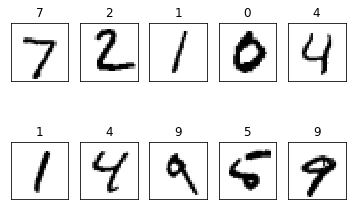

In [53]:
labels = sess.run(model,feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1})
fig = plt.figure()

for i in range(10):
  subplot = fig.add_subplot(2,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)

plt.show()